In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")
data.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 589.1+ KB


In [4]:
data.describe()

,Age,Annual Income,Spending Score
count,15079.000000,15079.000000,15079.000000
mean,54.191591,109742.880562,50.591617
std,21.119207,52249.425866,28.726977
min,18.000000,20022.000000,1.000000
25%,36.000000,64141.000000,26.000000
50%,54.000000,109190.000000,51.000000
75%,72.000000,155008.000000,75.000000
max,90.000000,199974.000000,100.000000


In [5]:
data.shape

(15079, 5)

In [6]:
data.describe

<bound method NDFrame.describe of                                 Customer ID  Age  Gender  Annual Income  \
0      d410ea53-6661-42a9-ad3a-f554b05fd2a7   30    Male         151479   
1      1770b26f-493f-46b6-837f-4237fb5a314e   58  Female         185088   
2      e81aa8eb-1767-4b77-87ce-1620dc732c5e   62  Female          70912   
3      9795712a-ad19-47bf-8886-4f997d6046e3   23    Male          55460   
4      64139426-2226-4cd6-bf09-91bce4b4db5e   24    Male         153752   
...                                     ...  ...     ...            ...   
15074  a0504768-a85f-4930-ac24-55bc8e4fec9e   29  Female          97723   
15075  a08c4e0e-d1fe-48e7-9366-aab11ae409cd   22    Male          73361   
15076  0e87c25a-268c-401a-8ba1-7111dcde6f1a   18  Female         112337   
15077  5f388cbe-3373-4e16-b743-38f508f2249f   26  Female          94312   
15078  b8b8f561-ebca-4401-8afe-544c906554ba   19    Male          78045   

       Spending Score  
0                  89  
1                

In [7]:
data.isnull().sum()

Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

In [14]:
data.isnull().any()

Customer ID       False
Age               False
Gender            False
Annual Income     False
Spending Score    False
dtype: bool

C:\ProgramData\anaconda3\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


<Axes: xlabel='Annual Income', ylabel='Spending Score'>

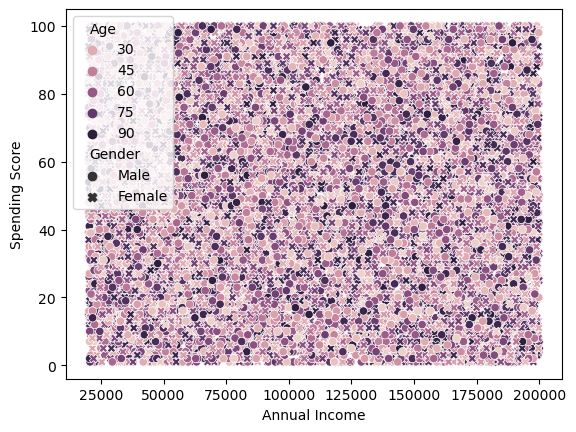

In [15]:
sns.scatterplot(data=data,x='Annual Income',y='Spending Score',hue='Age',style='Gender', cmap='viridis')

In [16]:
targets = ['Age','Annual Income','Spending Score']
data1=data[targets].copy()
data1.head()

,Age,Annual Income,Spending Score
0,30,151479,89
1,58,185088,95
2,62,70912,76
3,23,55460,57
4,24,153752,76


In [17]:
data.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [18]:
data1.max()

Age                   90
Annual Income     199974
Spending Score       100
dtype: int64

In [19]:
data1.min()

Age                  18
Annual Income     20022
Spending Score        1
dtype: int64

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(1,10))

In [22]:
scaler.fit(data1)

MinMaxScaler(feature_range=(1, 10))

In [23]:
data1=scaler.transform(data1)

In [26]:
data1=pd.DataFrame(data=data1, columns=targets)

In [27]:
data1.describe()

,Age,Annual Income,Spending Score
count,15079.000000,15079.000000,15079.000000
mean,5.523949,5.487241,5.508329
std,2.639901,2.613168,2.611543
min,1.000000,1.000000,1.000000
25%,3.250000,3.206538,3.272727
50%,5.500000,5.459589,5.545455
75%,7.750000,7.751100,7.727273
max,10.000000,10.000000,10.000000


In [28]:
data1.head()

,Age,Annual Income,Spending Score
0,2.500,7.574603,9.000000
1,6.000,9.255501,9.545455
2,6.500,3.545179,7.818182
3,1.625,2.772373,6.090909
4,1.750,7.688284,7.818182


In [29]:
def random_centroids(data1, k):
    centroids = []
    for i in range(k):
        centroid = data1.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [32]:
centroids = random_centroids(data1,3)
print(centroids)

                       0         1          2
Age             2.125000  8.875000  10.000000
Annual Income   4.792761  3.303714   5.513704
Spending Score  7.272727  7.181818   1.909091


In [33]:
def get_labels(data1, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data1 - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [34]:
labels = get_labels(data1, centroids)


In [35]:
labels.value_counts()

0    7249
1    4242
2    3588
dtype: int64

In [36]:
def new_centroids(data1, labels, k):
    centroids = data1.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids


In [38]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [39]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data1_2d = pca.fit_transform(data1)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data1_2d[:,0], y=data1_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

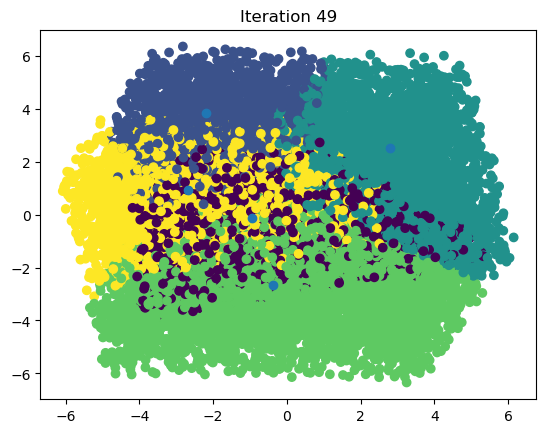

In [41]:
max_iterations = 100
centroid_count = 5

centroids = random_centroids(data1, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data1, centroids)
    centroids = new_centroids(data1, labels, centroid_count)
    plot_clusters(data1, labels, centroids, iteration)
    iteration += 1

In [46]:
cluster22=data[labels == 0][['Customer ID','Gender']+ targets]
cluster22

,Customer ID,Gender,Age,Annual Income,Spending Score
5,7e211337-e92f-4140-8231-5c9ac7a2aa12,Male,42,158335,40
6,30661d57-eeb5-4886-970a-9c7d0f260ad8,Female,27,163501,37
20,05948202-e483-482a-9c02-6a655498002b,Male,21,199879,49
22,dd6223b5-5aae-468b-b936-618b513d4e70,Male,24,109188,6
25,65348b4f-9170-4edc-b035-cc484416face,Female,19,192492,57
...,...,...,...,...,...
15046,5f2e86a3-d244-488b-ad36-c79cf46be46b,Female,35,192517,34
15047,7a509b25-8e2f-4907-a2d9-7e90723528c6,Female,50,190722,7
15059,f4fdd6f7-f6cb-4c23-9964-6c715c754d8b,Female,26,179159,55
15065,f7a9e3f8-4567-4fd9-82ae-00469fec391a,Female,72,173180,2


In [47]:
cluster22.describe()

,Age,Annual Income,Spending Score
count,2431.000000,2431.000000,2431.000000
mean,40.519951,157043.192102,23.935006
std,15.320859,27005.740369,14.796198
min,18.000000,101535.000000,1.000000
25%,27.000000,134907.000000,12.000000
50%,39.000000,159566.000000,23.000000
75%,52.000000,180010.500000,35.000000
max,84.000000,199934.000000,62.000000


<Axes: >

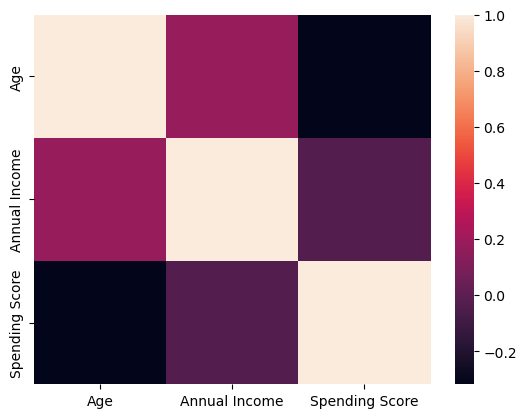

In [49]:
sns.heatmap(cluster22.corr(numeric_only=True))

In [52]:
cluster2=data[labels == 1][['Customer ID','Gender']+targets]
cluster2

,Customer ID,Gender,Age,Annual Income,Spending Score
7,43417ade-6b17-431e-ae76-d8ed26aa46ac,Male,24,70476,17
12,eb0e4ebc-fcc1-424f-b083-81987583ecc6,Male,25,87576,17
19,baa61fc0-4a1f-4210-916b-669d1ec44dbd,Male,26,45518,12
23,9c702610-d6ce-48fe-9857-9e295e161ceb,Female,39,48212,36
43,3e260c72-5788-4641-8dad-9cc7a4eaafef,Male,45,82425,39
...,...,...,...,...,...
15067,33f77ca2-9eee-4e60-b5dc-9b95365b10f3,Male,32,59424,26
15072,02da8108-fe4f-4300-a4d3-e2210f8d240f,Female,35,105107,49
15074,a0504768-a85f-4930-ac24-55bc8e4fec9e,Female,29,97723,30
15077,5f388cbe-3373-4e16-b743-38f508f2249f,Female,26,94312,5


In [53]:
cluster2.describe()

,Age,Annual Income,Spending Score
count,1774.000000,1774.000000,1774.000000
mean,35.111612,60443.527057,25.618940
std,10.427628,24470.673905,14.499206
min,18.000000,20177.000000,1.000000
25%,26.000000,39901.750000,13.000000
50%,35.000000,58375.000000,26.000000
75%,44.000000,81094.750000,38.000000
max,57.000000,108673.000000,53.000000


In [54]:
cluster33=data[labels == 2][['Customer ID','Gender']+targets]
cluster33

,Customer ID,Gender,Age,Annual Income,Spending Score
8,86f73b1a-6a91-4d7e-ad21-0aefcf6111cc,Male,83,47743,34
9,b20fe0a0-e254-4116-b804-5403bb2f59ea,Female,62,63448,3
18,8bbbdbbe-7f8a-4c9c-afed-f6969f49e9ac,Male,65,87270,3
26,c2fd4929-fc3e-423a-8dd9-1fb239ef4de6,Male,79,109550,7
27,eb6d1dfc-5b3a-4ade-8521-71db4659ad13,Female,61,38132,15
...,...,...,...,...,...
15060,36acd568-9b2b-45ab-b10b-2aeb10ef88fc,Female,79,126265,23
15061,690747f5-9039-43b6-b959-3575661f532a,Male,81,70574,35
15066,7051c7e2-5864-470c-9cea-15e5d6f9efcf,Female,69,32370,39
15068,2b5361cb-9fe3-4129-aab5-fb6c45e22051,Female,71,65773,60


In [55]:
cluster33.describe()

,Age,Annual Income,Spending Score
count,3504.000000,3504.000000,3504.000000
mean,75.618436,85784.676370,32.346461
std,10.018579,41335.499333,20.387408
min,51.000000,20089.000000,1.000000
25%,68.000000,52200.250000,16.000000
50%,77.000000,81958.000000,30.000000
75%,84.000000,112937.500000,46.000000
max,90.000000,199510.000000,91.000000


In [56]:
cluster4=data[labels == 3][['Customer ID','Gender']+targets]
cluster4

,Customer ID,Gender,Age,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,Male,30,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,Female,58,185088,95
4,64139426-2226-4cd6-bf09-91bce4b4db5e,Male,24,153752,76
10,49ba3e9d-a590-4303-b443-e794d0364c11,Male,37,170566,75
13,caa4ad5a-51b2-4af1-91cb-e2802f620239,Female,32,159892,96
...,...,...,...,...,...
15050,fd3e05a0-fc2e-459e-852c-865b6d347fd8,Male,57,181803,86
15051,4390d80e-240c-405e-b7e9-b99f8e2a233b,Male,41,113944,61
15056,38fa5453-b383-4758-bb59-36ee6c83a599,Male,50,161805,43
15062,1a53a4a4-c16b-4386-bf28-5842cd3f3f9b,Female,24,166849,74


In [57]:
cluster4.describe()

,Age,Annual Income,Spending Score
count,4487.000000,4487.000000,4487.000000
mean,58.100513,152779.780700,71.993760
std,19.580746,29251.820999,17.306344
min,18.000000,74210.000000,27.000000
25%,43.000000,130068.000000,59.000000
50%,59.000000,154709.000000,73.000000
75%,74.000000,177528.000000,87.000000
max,90.000000,199974.000000,100.000000


In [59]:
from sklearn.cluster import KMeans
kmeans = KMeans(5)
kmeans.fit(data1)

KMeans(n_clusters=5)

In [60]:
a=kmeans.get_feature_names_out()

In [62]:
a[0]

'kmeans0'

In [64]:
pd.DataFrame(kmeans.cluster_centers_, columns=targets).T

,0,1,2,3,4
Age,3.355082,7.464076,3.157332,5.226402,8.077953
Annual Income,7.649262,3.350051,5.980003,2.977763,7.742373
Spending Score,3.241182,7.685717,7.974758,3.251815,5.203644


In [69]:
new=np.array([[84,50000,50]])

In [70]:
scaled_data = scaler.transform(new)
scaled_data

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[9.25      , 2.49929981, 5.45454545]])

In [71]:
kmeans.predict(scaled_data)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

In [72]:
data.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [73]:
X=data.drop(columns=['Customer ID','Gender'])

In [74]:
X.shape

(15079, 3)

In [75]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [76]:
column_trans = make_column_transformer(
    (scaler, ['Age', 'Annual Income', 'Spending Score']),
    remainder='passthrough')

In [77]:
column_trans.fit_transform(X);


In [78]:
k_range = range(1,10)
sse = []
for i in k_range:
    Kmeans = KMeans(n_clusters=i, random_state=0)
    pipe = make_pipeline(column_trans, Kmeans)
    pipe.fit_predict(X)
    sse.append(pipe[1].inertia_)

In [79]:
sse

[310876.4492487762,
 232070.37899240397,
 184822.86718019267,
 148009.63364735933,
 124036.4849295413,
 102323.68512724419,
 89586.26029390356,
 77759.90258105856,
 72923.1975345492]

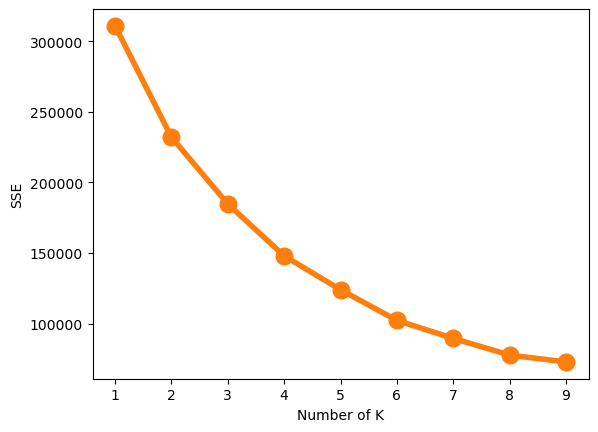

In [80]:
plt.plot(k_range, sse)
plt.plot(range(1,10),sse, linewidth=4, markersize=12,marker='o')
plt.xlabel('Number of K')
plt.ylabel('SSE')
plt.show()

In [81]:
Kmeans = KMeans(n_clusters=5, init = "k-means++", random_state = 0)

In [83]:
pipeline = make_pipeline(column_trans, Kmeans)
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(feature_range=(1,
                                                                              10)),
                                                  ['Age', 'Annual Income',
                                                   'Spending Score'])])),
                ('kmeans', KMeans(n_clusters=5, random_state=0))])

In [84]:
clusters = pipeline.fit_predict(X)

In [85]:
X["Cluster"] = clusters

In [86]:
X.head()

,Age,Annual Income,Spending Score,Cluster
0,30,151479,89,3
1,58,185088,95,3
2,62,70912,76,4
3,23,55460,57,3
4,24,153752,76,3


In [89]:
import pickle
pickle.dump(pipe,open("goldenproject.pkl","wb"))
model=pickle.load(open('goldenproject.pkl','rb'))